In [101]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc
import warnings
warnings.filterwarnings("ignore")

In [102]:
df1=pd.read_excel("working_hours_lost_covid.xlsx",skiprows=5)

In [103]:
df1

,Reference area,Source,Time,Value,Unnamed: 4
0,World,ILO - ILO Modelled Estimates,2020,8.9,NaN
1,World,ILO - ILO Modelled Estimates,2021,4.3,NaN
2,World: Low income,ILO - ILO Modelled Estimates,2020,6.7,NaN
3,World: Low income,ILO - ILO Modelled Estimates,2021,4.9,NaN
4,World: Lower-middle income,ILO - ILO Modelled Estimates,2020,11.8,NaN
...,...,...,...,...,...
561,Yemen,ILO - ILO Modelled Estimates,2021,2.9,NaN
562,Zambia,ILO - ILO Modelled Estimates,2020,3.4,NaN
563,Zambia,ILO - ILO Modelled Estimates,2021,4.9,NaN
564,Zimbabwe,ILO - ILO Modelled Estimates,2020,9.2,NaN


In [104]:
df1=df1.drop("Unnamed: 4",axis=1)

In [105]:
df1.isnull().sum()

Reference area    0
Source            0
Time              0
Value             0
dtype: int64

In [106]:
num_features=df1.select_dtypes(include=['int64','float64']).columns
cat_features=df1.select_dtypes(include='object').columns

In [107]:
cat_features

Index(['Reference area', 'Source'], dtype='object')

In [108]:
df1=df1.drop("Source",axis=1)

In [109]:
fig=px.bar(df1,x="Time",y="Value",color="Reference area",hover_data=["Reference area"])
fig.show()

In [110]:
fig=px.bar(df1,x="Reference area",y="Value",color="Time",hover_data=["Time"])
fig.show()

In [86]:
df=df1

In [87]:
df

,Reference area,Time,Value
0,274,2020,8.9
1,274,2021,4.3
2,277,2020,6.7
3,277,2021,4.9
4,278,2020,11.8
...,...,...,...
561,280,2021,2.9
562,281,2020,3.4
563,281,2021,4.9
564,282,2020,9.2


In [88]:
from sklearn.preprocessing import LabelEncoder
scale=LabelEncoder()

In [61]:
for i in cat_features:
    df[i]=scale.fit_transform(df[i])

KeyError: 'Source'

In [62]:
df

,Reference area,Time,Value
0,274,2020,8.9
1,274,2021,4.3
2,277,2020,6.7
3,277,2021,4.9
4,278,2020,11.8
...,...,...,...
561,280,2021,2.9
562,281,2020,3.4
563,281,2021,4.9
564,282,2020,9.2


In [63]:
Value=df['Value']

<AxesSubplot:xlabel='Value', ylabel='Density'>

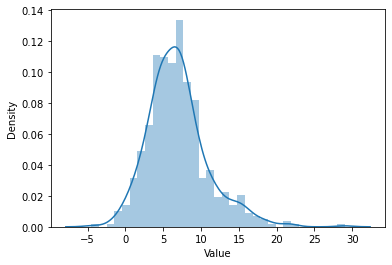

In [64]:
sns.distplot(df['Value']) #normalised values

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [66]:
Value = df1[['Value']]
Value.head()

,Value
0,8.9
1,4.3
2,6.7
3,4.9
4,11.8


In [67]:
forecast_out=30
#Create another column (the target ) shifted 'n' units up
Value['Prediction'] = Value[['Value']].shift(-forecast_out)
#print the new data set
print(Value.tail())

     Value  Prediction
561    2.9         NaN
562    3.4         NaN
563    4.9         NaN
564    9.2         NaN
565    6.3         NaN


In [68]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X1 = np.array(Value.drop(['Prediction'],1))

#Remove the last '30' rows
X1 = X1[:-forecast_out]
print(X1)

[[ 8.9]
 [ 4.3]
 [ 6.7]
 [ 4.9]
 [11.8]
 [ 6.8]
 [ 7.2]
 [ 2.2]
 [ 7.9]
 [ 3.9]
 [ 7.7]
 [ 5.2]
 [ 6.8]
 [ 5.1]
 [ 7.8]
 [ 5. ]
 [12.9]
 [ 9.3]
 [ 7.4]
 [ 7. ]
 [ 9.8]
 [ 6.2]
 [ 9.8]
 [ 6.1]
 [ 9.6]
 [ 7. ]
 [ 7.3]
 [ 5.1]
 [ 6.8]
 [ 5.1]
 [ 7.1]
 [ 4.6]
 [13.1]
 [ 9.5]
 [ 7.4]
 [ 7. ]
 [ 6.8]
 [ 4.5]
 [ 7.2]
 [ 5.1]
 [13.2]
 [ 9.6]
 [ 6.8]
 [ 4.6]
 [14.1]
 [ 5.5]
 [ 7.8]
 [ 6.3]
 [15. ]
 [ 2.9]
 [17.1]
 [ 6.3]
 [ 9.9]
 [ 4.7]
 [16.7]
 [ 6. ]
 [ 7.8]
 [ 6.3]
 [15. ]
 [ 2.9]
 [17.1]
 [ 6.3]
 [14.8]
 [ 5. ]
 [11.1]
 [ 6.4]
 [15.3]
 [ 5.2]
 [17.8]
 [ 6.3]
 [ 9.6]
 [ 4.6]
 [ 9.6]
 [ 4.6]
 [ 9. ]
 [ 6.2]
 [ 4.6]
 [ 4. ]
 [16. ]
 [11.9]
 [10.8]
 [ 7.7]
 [ 9.5]
 [ 6.1]
 [ 8.2]
 [ 4. ]
 [ 6.4]
 [ 4.8]
 [13. ]
 [ 7.4]
 [ 4.5]
 [ 1. ]
 [ 4.5]
 [ 4.1]
 [ 4.2]
 [ 0.2]
 [ 5.8]
 [ 5.4]
 [10.3]
 [15.7]
 [ 4.1]
 [-0.4]
 [ 4.6]
 [ 4.5]
 [ 7.7]
 [ 7. ]
 [ 9.7]
 [ 8.5]
 [ 6.5]
 [ 6.3]
 [ 3.8]
 [ 3.4]
 [ 7.9]
 [ 7.3]
 [ 3.6]
 [ 2.2]
 [13.3]
 [ 7.2]
 [ 7.4]
 [ 4. ]
 [13.6]
 [ 7.2]
 [ 5.3]
 [ 8.3]
 [ 8.1]


In [69]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y1 = np.array(Value['Prediction'])
# Get all of the y values except the last '30' rows
y1 = y1[:-forecast_out]
print(y1)

[ 7.1  4.6 13.1  9.5  7.4  7.   6.8  4.5  7.2  5.1 13.2  9.6  6.8  4.6
 14.1  5.5  7.8  6.3 15.   2.9 17.1  6.3  9.9  4.7 16.7  6.   7.8  6.3
 15.   2.9 17.1  6.3 14.8  5.  11.1  6.4 15.3  5.2 17.8  6.3  9.6  4.6
  9.6  4.6  9.   6.2  4.6  4.  16.  11.9 10.8  7.7  9.5  6.1  8.2  4.
  6.4  4.8 13.   7.4  4.5  1.   4.5  4.1  4.2  0.2  5.8  5.4 10.3 15.7
  4.1 -0.4  4.6  4.5  7.7  7.   9.7  8.5  6.5  6.3  3.8  3.4  7.9  7.3
  3.6  2.2 13.3  7.2  7.4  4.  13.6  7.2  5.3  8.3  8.1  3.1  4.3  5.5
  8.7  6.9  8.6  2.5  7.8  2.9  8.4  3.3  6.8  1.1  8.5  3.4  8.9  3.7
 11.3  3.7  6.1  2.9  5.8  2.   8.5  7.1  5.8  1.4  4.5  0.4 11.6  4.7
  4.3  5.5  8.9  6.6 13.   4.2  8.2  1.9  8.7  6.  13.5  3.7  7.9  7.3
  8.6  2.9  7.9  7.4  3.   2.7  8.7  3.4  9.1  5.5  8.4  4.5  8.6  6.5
  9.3  6.1 11.   7.2  7.4  4.   9.1  3.5  9.7  7.4  8.7  5.7 21.9  8.9
 14.9  3.5  4.6  1.6 12.3  7.7 12.   4.6 15.6  4.3  8.9  7.1 11.9  7.4
 10.4  4.1  2.5  3.2  7.6  1.5 10.6  7.4  3.9  4.1 11.   7.7 14.2 -0.9
  7.4  

In [70]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [71]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [72]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  -0.16174252557852498


In [73]:
from sklearn.linear_model import LinearRegression
y = df['Reference area'].unique()  # values converts it into a numpy array
y=pd.DataFrame(y)
y = y.iloc[:, 0].values.reshape(-1, 1)
z=df.groupby('Reference area')['Value'].sum()
z=pd.DataFrame(z)
z
X = z.iloc[:, 0].values.reshape(-1, 1)
len(X)

283

In [74]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

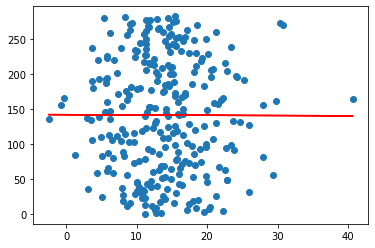

In [75]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [76]:
linear_regressor.score(X,y)

8.881662791337952e-06

In [77]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

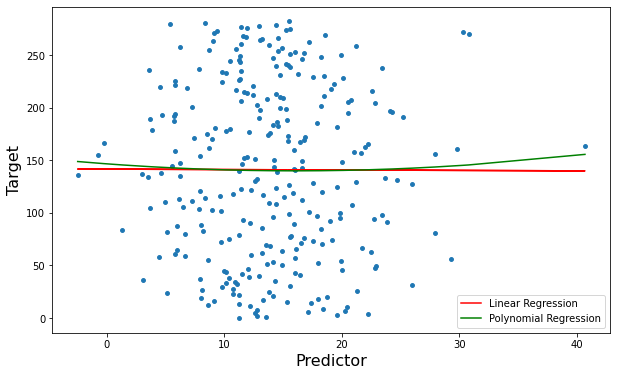

In [78]:
poly_pred=pipe.predict(X.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X,y,s=15)
plt.plot(X,Y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()